In [3]:
import os
import gensim
from load_vectors import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

unable to import 'smart_open.gcs', disabling that module


In [4]:
print(wv.vectors_vocab.shape)

(2000000, 300)


In [101]:
adjectives = pd.read_csv("data/adjective_synonyms.csv")
adjectives.head()

,hardworking,coward,arrogant,drunken,macho,fiery,chauvinism,lazy
0,hardworking,coward,arrogant,drunken,macho,fiery,chauvinism,lazy
1,dedicated,wimp,aloof,alcoholic,manly,hot-blooded,patriotism,passive
2,assiduous,weak,bossy,drinking,machismo,hot-headed,bigotry,procrastinating
3,diligent,mouse,cavalier,alcohol,NaN,hot-tempered,nationalism,idle
4,assiduous,NaN,cocky,hard-drinker,NaN,passionate,racist,loafing


In [202]:
nationalities = np.array([['britain', 'british'],
                        ['france', 'french'],
                        ['spain', 'spanish'],
                        ['italy', 'italian'],
                        ['germany','german'],
                        ['poland', 'polish'],
                         ['cat', 'cat']])
adj_columns = adjectives.columns.values

In [203]:
# distance(u,v) = 1 - cosine_similarity(u,v)
def nationality_distance(wv, nat_arr, adj_arr):
    c,n = nat_arr
    adj_arr = list(adj_arr)
    try:
        n_distances = wv.distances(n, adj_arr)
        c_distances = wv.distances(c, adj_arr)
    except KeyError:
        n_distances = []
        c_distances = []
        for adj in adj_arr:
            if adj in wv:
                n_distances.append(wv.distance(n, adj))
                c_distances.append(wv.distance(c, adj))
        n_distances = np.array(n_distances, dtype=float)
        c_distances = np.array(c_distances, dtype=float)
    distances = n_distances
    return n, adj_arr[0], adj_arr, distances

In [204]:
results = []
for nat_arr in nationalities:
    for adj in adj_columns:
        adj_arr = adjectives[adj].dropna().tolist()
        results.append(nationality_distance(wv, nat_arr, adj_arr))

In [205]:
results_df = pd.DataFrame(data=results, columns=['nationality', 'stereotype', 'adjectives', 'distances'])

results_df_1 = results_df.distances.apply(pd.Series)\
                    .merge(results_df.drop("adjectives",axis=1), right_index=True, left_index=True)\
                    .drop('distances', axis=1)\
                    .melt(id_vars = ['nationality','stereotype'], value_name="distance")\
                    .drop("variable", axis=1).dropna(axis=0)\
                    .sort_values(['nationality', 'stereotype']).reset_index(drop=True)

results_df_2 = results_df.adjectives.apply(pd.Series)\
                    .merge(results_df.drop("distances",axis=1), right_index=True, left_index=True)\
                    .drop('adjectives', axis=1)\
                    .melt(id_vars = ['nationality','stereotype'], value_name="adjective")\
                    .drop("variable", axis=1).dropna(axis=0)\
                    .sort_values(['nationality', 'stereotype']).reset_index(drop=True)\
                    .drop(['nationality', 'stereotype'], axis=1)

results_df = results_df_1.merge(results_df_2, right_index=True, left_index=True)

In [206]:
results_df.head()

,nationality,stereotype,distance,adjective
0,british,arrogant,0.783831,arrogant
1,british,arrogant,0.862816,aloof
2,british,arrogant,0.808620,bossy
3,british,arrogant,0.752838,cavalier
4,british,arrogant,0.771651,cocky


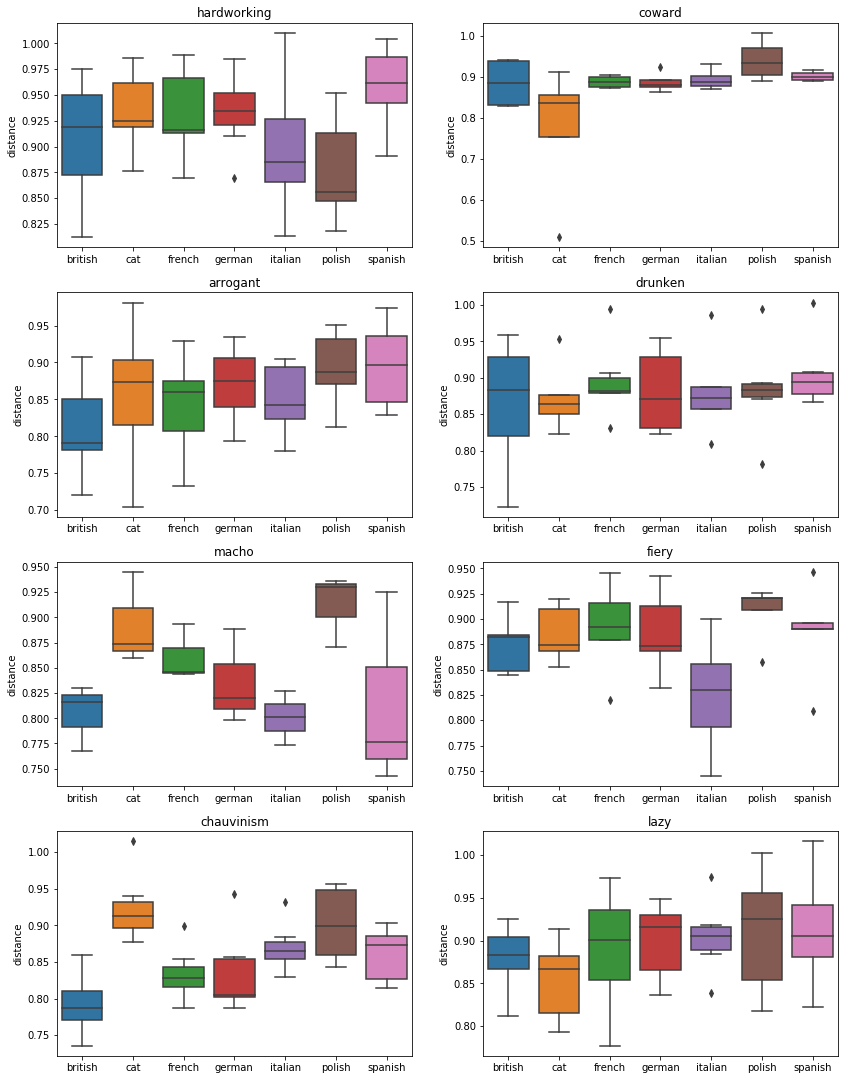

In [207]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,19))
axes = axes.flatten()
for i, adj in enumerate(adj_columns):
    sub_df = results_df.loc[results_df.stereotype==adj]
    sns.boxplot(x="nationality", y="distance", data=sub_df, ax=axes[i])
    axes[i].set_title(adj)
    axes[i].set_xlabel("")
plt.show()

In [208]:
wv.distance("night", "day")

0.36492836475372314

0.63507164

In [211]:
wv.most_similar(['woman','king'], negative=['man'])

[('queen', 0.7554813623428345),
 ('queen-mother', 0.6141631603240967),
 ('princess', 0.5755329132080078),
 ('monarch', 0.5741075277328491),
 ('kings', 0.5688967108726501),
 ('queenship', 0.5649925470352173),
 ('Queen', 0.5638619661331177),
 ('empress', 0.5544730424880981),
 ('consort', 0.5524798631668091),
 ('queen.The', 0.5497488975524902)]

In [239]:
wv.most_similar(['poland','racist'], negative=['french'])

[('racists', 0.5251808166503906),
 ('racist.', 0.5227146148681641),
 ('rascist', 0.5202164649963379),
 ('racist-', 0.5198675394058228),
 ('anti-white', 0.4939606487751007),
 ('anti-White', 0.49224182963371277),
 ('RACIST', 0.48594677448272705),
 ('anti-semitic', 0.48554107546806335),
 ('rasist', 0.4793544113636017),
 ('racially-based', 0.4711179733276367)]